In [1]:
import numpy as np
from numpy import linalg as LA


import scipy
from scipy import linalg
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.utils.extmath import randomized_svd # esta funcion vamos a usar

In [2]:
"""Ejercicio Nº1"""

matrix = []  # vamos a transformar el archivo .csv en un np.array
with open("10 - co_occur.csv", "r") as f:
    for line in f:     # Phyton entiende que line es una fila
        currow = []
        entries = line.split(",") # entries es una list donde cada elemento es lo que esta entre ",". Pero sus elementos son
                                  # formato string. Hay que pasarlo a float
        for entry in entries:
            currow.append(float(entry))  # transforma la string en float
        matrix.append(currow)  # matrix no es aun un numpy array, es una lista, es mas eficiente hacer esto y al final 
                               # transformarlo en un numpy array.
matrix = np.array(matrix)  # transforma la lista matrix en un numpy array

In [3]:
np.save("10 - co_occur.npy", matrix) # la guardamos, asi no tenemos que hacer lo anterior nuevamente

In [4]:
M = np.load("10 - co_occur.npy") # abre el np.array guardado
M.shape

(10000, 10000)

In [5]:
words = []  # vamos a transformar el archivo .txt en una list de Python
with open("10 - dictionary.txt", "r") as f:
    for line in f:
        words.append(line.replace("\n",""))
print(words[:10])   # el indice i corresponde al entry "i" tanto de fila como de columna de M
print("el indice de la palabra 'the' es: ", words.index("the")) # la funcion a.index("b") devuelve el
print("el indice de la palabra 'in' es: ", words.index("in"))  # indice de la "string" "b" en la la lista "a".

['the', 'of', 'in', 'and', 'to', 'was', 'is', 'for', 'on', 'as']
el indice de la palabra 'the' es:  0
el indice de la palabra 'in' es:  2


In [6]:
"""Ejercicio Nº2"""
Mlog = np.log(1 + M) # esta matriz es simetrica
U, d, VT = randomized_svd(Mlog, n_components = 100)

In [7]:
print("U.shape = ", U.shape)
print("d.shape = ", d.shape)
print("VT.shape = ", VT.shape)
print(d[:10])


U.shape =  (10000, 100)
d.shape =  (100,)
VT.shape =  (100, 10000)
[14299.74306502  2864.81560151  2682.6537864   1745.55492021
  1528.41717494  1308.76186927  1185.74051684  1128.05264658
  1102.55714239   956.3077184 ]


### Ejercicio 2. 

Luego de la Singular Value Decomposition (descomposición por valores singulares) de nuestra matriz de datos $M$ obtenemos los tres elementos resultantes del proceso:
- Los Vectores singulares de izquierda (Left singular vectors) en la matriz $U$. Tiene la misma dimensión de columnas que $M$. Esta también suele ser denominada matriz de "eigen-data".
- La matriz $d$ con la diagonal de valores singulares. Estos SV son positivos y están ordenados jerárquicamente.
- Los Vectores singulares de derecha (Right singular vectors) en la matriz $V^T$. 

Si graficamos los nuestra matriz diagonal $d$ con matplotlib podemos observar la distribución "power-law" que estos siguen. Visto a continuación:

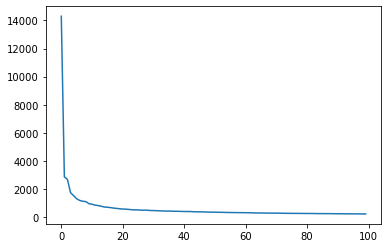

In [8]:
plt.plot(d)
plt.show()

En estadística, una ley potencial o ley de potencias (power law) es una relación funcional matemática entre dos cantidades o magnitudes donde un cambio relativo en una magnitud da como resultado un cambio relativo proporcional en la otra magnitud, independientemente del tamaño inicial de esas cantidades: una cantidad varía como potencia de otra.

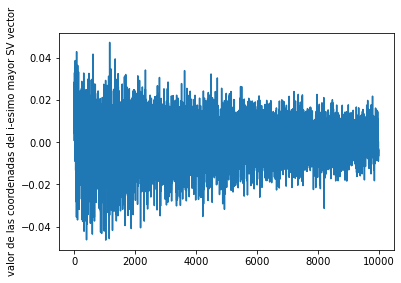

Indices de las coordenadas mas grandes en el vector 5
[1166   80  619 1347   36   30 1204   19  116 2341]

Indices de las coordenadas mas chicas en el vector 5
[1874  597  868  902 1153 1037  325 1259  406  988]

Palabras con las coordenadas mas grandes en el vector 5
['troops', 'him', 'killed', 'soldiers', 'they', 'had', 'emperor', 'were', 'them', 'attacked']

Palabras con las coordenadas mas chicas en el vector 5
['electronic', 'technology', 'computer', 'engineering', 'software', 'digital', 'research', 'web', 'science', 'online']


In [9]:
"""Ejercicio Nº3"""

# ploteamos los valores de las coordenadas de los vectores
# juegue con diferentes valores de i
i = 5    # JCJ: i va desde valores 0 a 99 (es la shape columnas de U(10k,100))
plt.plot(U[:,i])
plt.ylabel('valor de las coordenadas del i-esimo mayor SV vector')
plt.show()

# Extraemos los n_words indices de las max y min coordenadas
n_words = 10
largest_indexes = np.argpartition(U[:,i], -n_words)[-n_words:] # tomen esta funcion como viene...
smallest_indexes = np.argpartition(U[:,i], n_words)[:n_words]

print("Indices de las coordenadas mas grandes en el vector", i)
print(largest_indexes[::-1])
print("\nIndices de las coordenadas mas chicas en el vector", i)   
print(smallest_indexes[::-1])

# Mi pregunta es si deberia haber alguna relacion entre los indices y coordenadas (si son grandes o chicas estas ultimas)
# Respuesta: si hay... vemos a continuacion que ordena por campos semanticos

print("\nPalabras con las coordenadas mas grandes en el vector", i)
print([words[idx] for idx in largest_indexes[::-1]])
print("\nPalabras con las coordenadas mas chicas en el vector", i)
print([words[idx] for idx in smallest_indexes[::-1]])

In [10]:
# Ejercicio 4. (a)
Ushape = U.shape  #  = (10000, 100)
U2 = U**2
Un = np.sqrt(np.sum(U2,axis = 1)).reshape(Ushape[0],1)
U_rawnorm = U/Un # las filas de U_rawnorm estan normalizadas a 1
# y U_rawnorm[i,:] es la "mejor" proyeccion 100D de la palabra i

In [11]:
man_index = words.index("man")
woman_index = words.index("woman")
v1 = U_rawnorm[woman_index,:].reshape(Ushape[1],1) # vector proyeccion 100D de la palabra "woman"
v2 = U_rawnorm[man_index,:].reshape(Ushape[1],1) # vector proyeccion 100D de la palabra "man"
v = v1 - v2 # vector tal que sumado al vector man (v2) da el vector woman (v1)
v = v/LA.norm(v)

In [12]:
list_i = ["boy", "girl", "brother", "sister", "king", "queen", "he", "she", "john", "mary", "wall", "tree"]

In [13]:
Proy_words = np.zeros((len(list_i), Ushape[1]))
# matriz cuyas filas son las proyecciones 100D de las palabras en list_i
i = 0
for word in list_i:
    index = words.index(word)
    Proy_words[i,:] = U_rawnorm[index,:]
    i += 1

In [14]:
# Proyeccion, en la direccion de v, de las proyecciones 100D de las palabras en list_i
PrWords_v = np.dot(Proy_words, v)

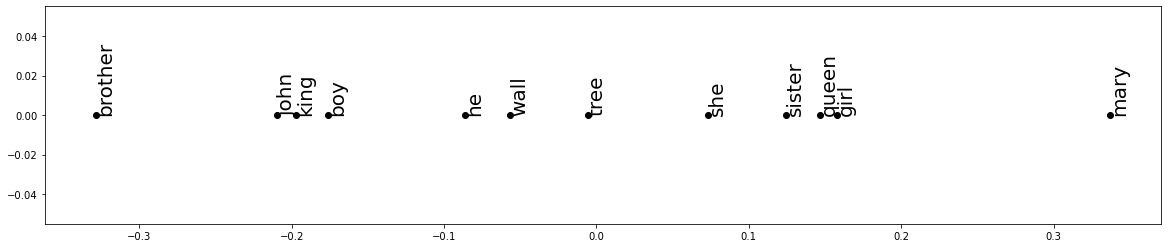

In [15]:
xs = [0] * len(list_i)

fig, ax = plt.subplots(figsize=(20,4))

plt.clf()
plt.plot(PrWords_v, xs, 'o', color='black')

for i in range(len(list_i)):
    plt.text(PrWords_v[i],0,list_i[i], {'ha': 'left', 'va': 'bottom'}, fontsize = 20, rotation=90)
plt.show()

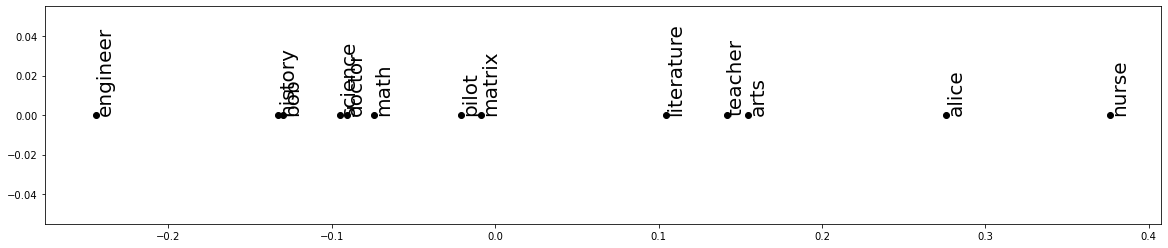

In [16]:
# Ejercicio 4. (b) (si solucion aca)

list_j = ["math", "matrix", "history", "nurse", "doctor", "pilot", "teacher", "engineer", 
          "science", "arts", "literature", "bob", "alice"]

Proy_words = np.zeros((len(list_j), Ushape[1]))
# matriz cuyas filas son las proyecciones 100D de las palabras en list_i
j = 0
for word in list_j:
    index = words.index(word)
    Proy_words[j,:] = U_rawnorm[index,:]
    j += 1
    
# Proyeccion, en la direccion de v, de las proyecciones 100D de las palabras en list_i
PrWords_v = np.dot(Proy_words, v)


xs = [0] * len(list_j)

fig, ax = plt.subplots(figsize=(20,4))

plt.clf()
plt.plot(PrWords_v, xs, 'o', color='black')

for i in range(len(list_j)):
    plt.text(PrWords_v[i],0,list_j[i], {'ha': 'left', 'va': 'bottom'}, fontsize = 20, rotation=90)
plt.show()

### Ejercicio 4.b

¿Qué observa? ¿Por qué crees que este es el caso? ¿Ves un problema potencial con esto? 

Por ejemplo, supongamos que LinkedIn usó tales proyecciones de palabras para extraer información de los currículums de los candidatos para mejorar su opción “buscar candidatos calificados”. ¿Cuál podría ser el resultado de esto?


__Respuesta:__

Recordemos que el que *difference vector* $\mathbf{v}$ corresponde a la diferencia de género, ya que está compuesto por $\mathbf{v} = \mathbf{v_1} - \mathbf{v_2} $ donde $\mathbf{v_1}$ es la proyección de la palabra para “woman” y $\mathbf{v_2}$ la proyección de la palabra “man”. 

Explicado lo anterior, lo que podemos observar es que la proyección sobre el vector de diferencia $\mathbf{v}$ de la lista de palabras de la consigna nos captura, en forma "semántica", esta diferencia de género en palabras que no se deberían distinguir por género en absoluto, como por ejemplo: engineer y literature. Notese que la distancia entre engineer, history, math respecto literature, teacher, arts es similar a la distancia que había entre boy y girl. 

Básicamente, hemos capturado un __sesgo__ correspondiente al texto utilizado que se plasma en el word embedding. En el ejemplo de nuestro ejercicio el sesgo de género (*gender bias*) sucede porque claramente las profesiones usadas dentro del texto eran empleadas para referirse a hombres o mujeres, según fuera el caso, y por ende algebraicamente se terminan capturando estas asociaciones a generos específicos cuando las proyectamos en el vector de diferencia. 

Sin embargo, esto no es correcto ni debería serlo, ya que de manera arbitraria la diferencia de género debería ser capturada como una distancia entre "ingeniero - ingeniera", en español por ejemplo, o bien como en ingles son sustantivos no asociados a género, la distancia debería ser cero en realidad. En otras palabras, en nuestro gráfico podrían estar más centrados los puntos. Aunque el algoritmo es completamente objetivo y mediante álgebra terminamos capturando diferencias que devienen de nuestra sociedad y los estereotipos, sabemos a posteriori que el resultado debe ser distinto al obtenido. Por este motivo es que buscaremos formas de abordar el sesgo para reducirlo o eliminarlo.

Por último, consideremos el ejemplo de la consigna de emplear un algoritmo para Word Embeddings sin tratar los sesgos.
Definitivamente, el resultado serían predicciones de "candidatos calificados" sesgadas por género, siendo por ejemplo las recomendaciones predicha para "ingeniería en software" siempre perfiles de ingenieros con sexo masculino. 

Cabe destacar, que así como hay un sesgo de género en el word embedding, podría haberlo también para etnicidad, edad, orientación sexual, estatus económico, etc. A continuación podemos mostrar una imágen muy interesante que refleja (a partir de una detección estadísticamente significativa) el cambio linguistico en los textos (Kulkarni, Al-Rfou, Perozzi, Skiena 2015). Esto intuitivamente nos permite pensar que los sesgos son fruto de la linguistica, y que los algoritmos reflejan objetivamente las diferencias capturadas.


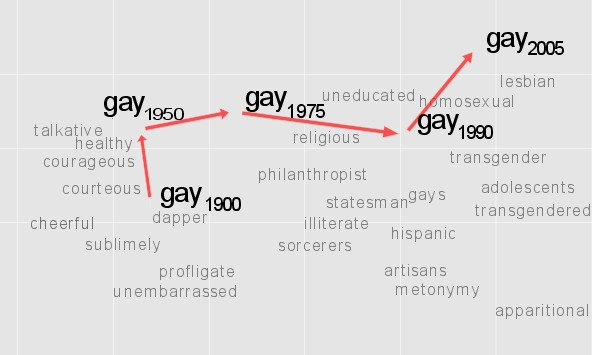


### Ejercicio 4.c

Como bien explicamos en la respuesta anterior, el sesgo es capturado en textos que son definidos en mayor o menor medida por las personas que lo escriben, por lo que reflejan a su vez muchos estereotipos sociales. El problema surge cuando esos textos son usados para trabajar con algoritmos (más especificamente en el caso de RNN o *Recurrent Neural Networks* el problema nace cuando estos textos son usados para entrenar el modelo).

En función del tratamiento explicado en el paper "Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings" de Bolukbasi, Chang, Zou, Saligrama, Kalai (2016) podemos abordar una reducción o eliminación del sesgo. Nos centraremos en explicar la intuición detrás del algoritmo y el algebra asociada, sin abordar mayores detalles técnicos.

1. Como primer paso, debemos __identificar la dirección del sesgo__ (*bias direction*) para todas las palabras, en nuestro ejemplo sería el difference vector de género. Esto significa que deberíamos tomar el embedding vector de "man" y restarle el embedding vector de "she" ($\mathbf{v} = \mathbf{v_1} - \mathbf{v_2} $ como ya hicimos anteriormente), pero iterar el proceso para muchas palabras que se definen por género (she/he, grandmother/grandfather, father/mother, etc.) y una vez capturadas las diferencias, tomar el promedio de estas (*average difference*). Esta será la dirección del sesgo.
Por el contrario, la dirección ortogonal a esta (ejemplo, la diferencia entre she y nurse) es la dirección sin sesgo (*non-bias direction*). Visto en un plano 2D:

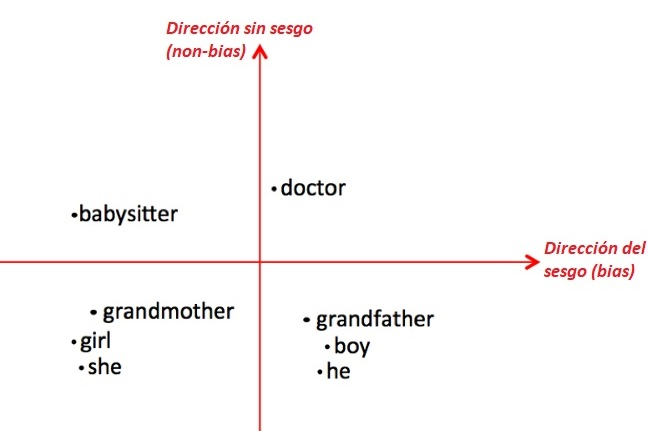

La dirección del sesgo también puede ser capturada usando Singular Value Decomposition.

2. El segundo paso es __neutralizar__: para cada palabra que no es definicional, es decir, que son neutrales al género (engineer, baby sitter, etc.) debemos proyectar el vector de estas en la dimension/direccion no sesgada. Una vez calculada la proyección, la restamos del vector original y obtendremos el componente "no sesgado". Para decirlo de otra manera, queremos que sean estrictamente neutrales las palabras. Visto en nuestro plano 2D:

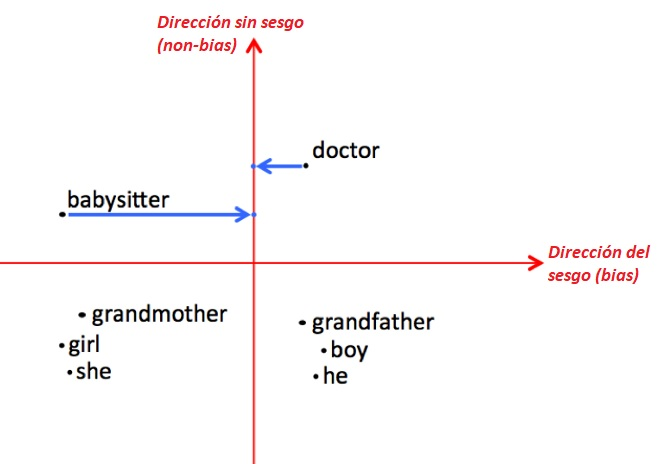

Básicamente la neutralización consta de tomar la proyección del vector sobre el vector de sesgo y luego, restarle ese componente al vector original:

$$e^{bias\_component} = \frac{\mathbf{e_i} \cdot \mathbf{v}}{||\mathbf{v}||^2} * \mathbf{v}\tag{2}$$


$$e^{debiased} = e - e^{bias\_component}\tag{3}$$

donde ya sabeamos que $\mathbf{v} = \mathbf{e_{man}} - \mathbf{e_{woman}}$ es el sesgo, como también por ejemplo $\mathbf{e_{he}} - \mathbf{e_{she}}$. Nosotros podemos asumir que $\mathbf{v}$ es el promedio de todas las diferencias de género calculadas. (Notese que cambiamos la notación de los vectores de palabras a $\mathbf{e}$ para mejorar la interpretación).

Visto en otra imagen para una mejor interpretación:

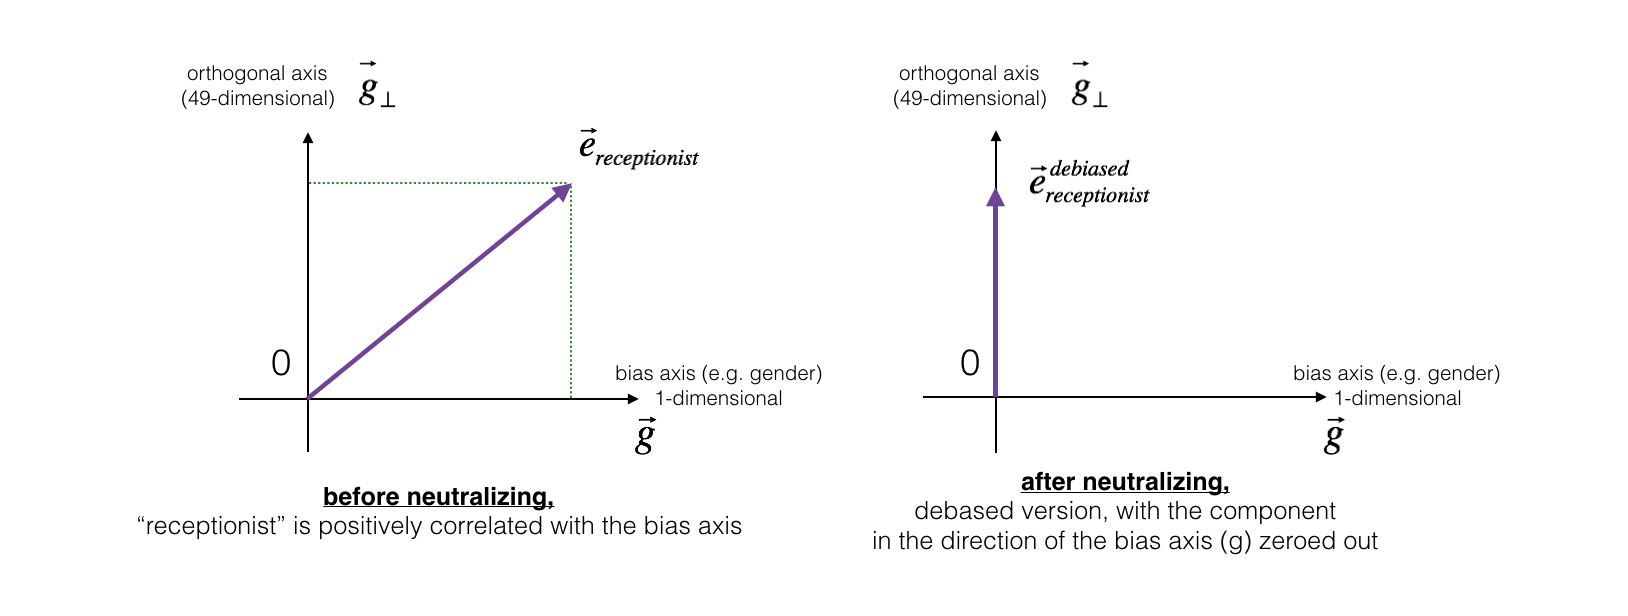

Notese que $g$ sería el sesgo, que nosotros antes representamos como el vector de diferencia $\mathbf{v}$. En un código de referencia con funciones para neutralizar se obtuvieron los siguientes resultados:

<table>
    <tr>
        <td>
            **Cosine similarity between receptionist and g (bias), before neutralizing:** :
        </td>
        <td>
         0.330779417506
        </td>
    </tr>
        <tr>
        <td>
            **Cosine similarity between receptionist and g (bias), after neutralizing:** :
        </td>
        <td>
         -3.26732746085e-17
    </tr>
</table>


3. El último paso es __ecualizar los pares de palabras__: para los pares de palabras que se definen por género (o sea, donde el género está implícito, por ejemplo en español: ingeniero/ingeniera, en ingles: she/he o boy/girl) queremos que sean equidistantes respecto una palabra no-definicional, como doctor, baby-sitter, etc. Dicho de otra manera, si la distancia entre "she" respecto "doctor" es mucho mayor que "he" respecto "doctor", ahora forzaremos que la distancia sea la misma. Visto en nuestro gráfico el antes/después de la ecualización:

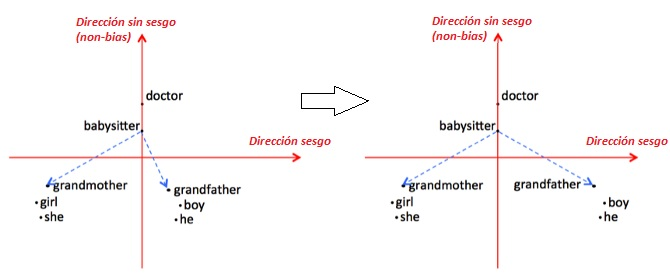


La derivación del álgebra para esto es un poco más extensa, pero las ecuaciones principales son las siguientes; como referencia se puede recurrir al paper mencionado (Bolukbasi et al., 2016) 

$$ \mu = \frac{e_{w1} + e_{w2}}{2}\tag{4}$$ 

$$ \mu_{B} = \frac {\mu \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{5}$$ 

$$\mu_{\perp} = \mu - \mu_{B} \tag{6}$$

$$ e_{w1B} = \frac {e_{w1} \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{7}$$ 
$$ e_{w2B} = \frac {e_{w2} \cdot \text{bias_axis}}{||\text{bias_axis}||_2^2} *\text{bias_axis}
\tag{8}$$


$$e_{w1B}^{corrected} = \sqrt{ |{1 - ||\mu_{\perp} ||^2_2} |} * \frac{e_{\text{w1B}} - \mu_B} {||(e_{w1} - \mu_{\perp}) - \mu_B||} \tag{9}$$


$$e_{w2B}^{corrected} = \sqrt{ |{1 - ||\mu_{\perp} ||^2_2} |} * \frac{e_{\text{w2B}} - \mu_B} {||(e_{w2} - \mu_{\perp}) - \mu_B||} \tag{10}$$

$$e_1 = e_{w1B}^{corrected} + \mu_{\perp} \tag{11}$$
$$e_2 = e_{w2B}^{corrected} + \mu_{\perp} \tag{12}$$


Visto en otra imagen para una mejor interpretación; en este ejemplo se ecualiza la distancia entre las palabras respecto el eje del sesgo, no necesariamente sobre una palabra específica como baby-sitter. El resultado es el mismo.

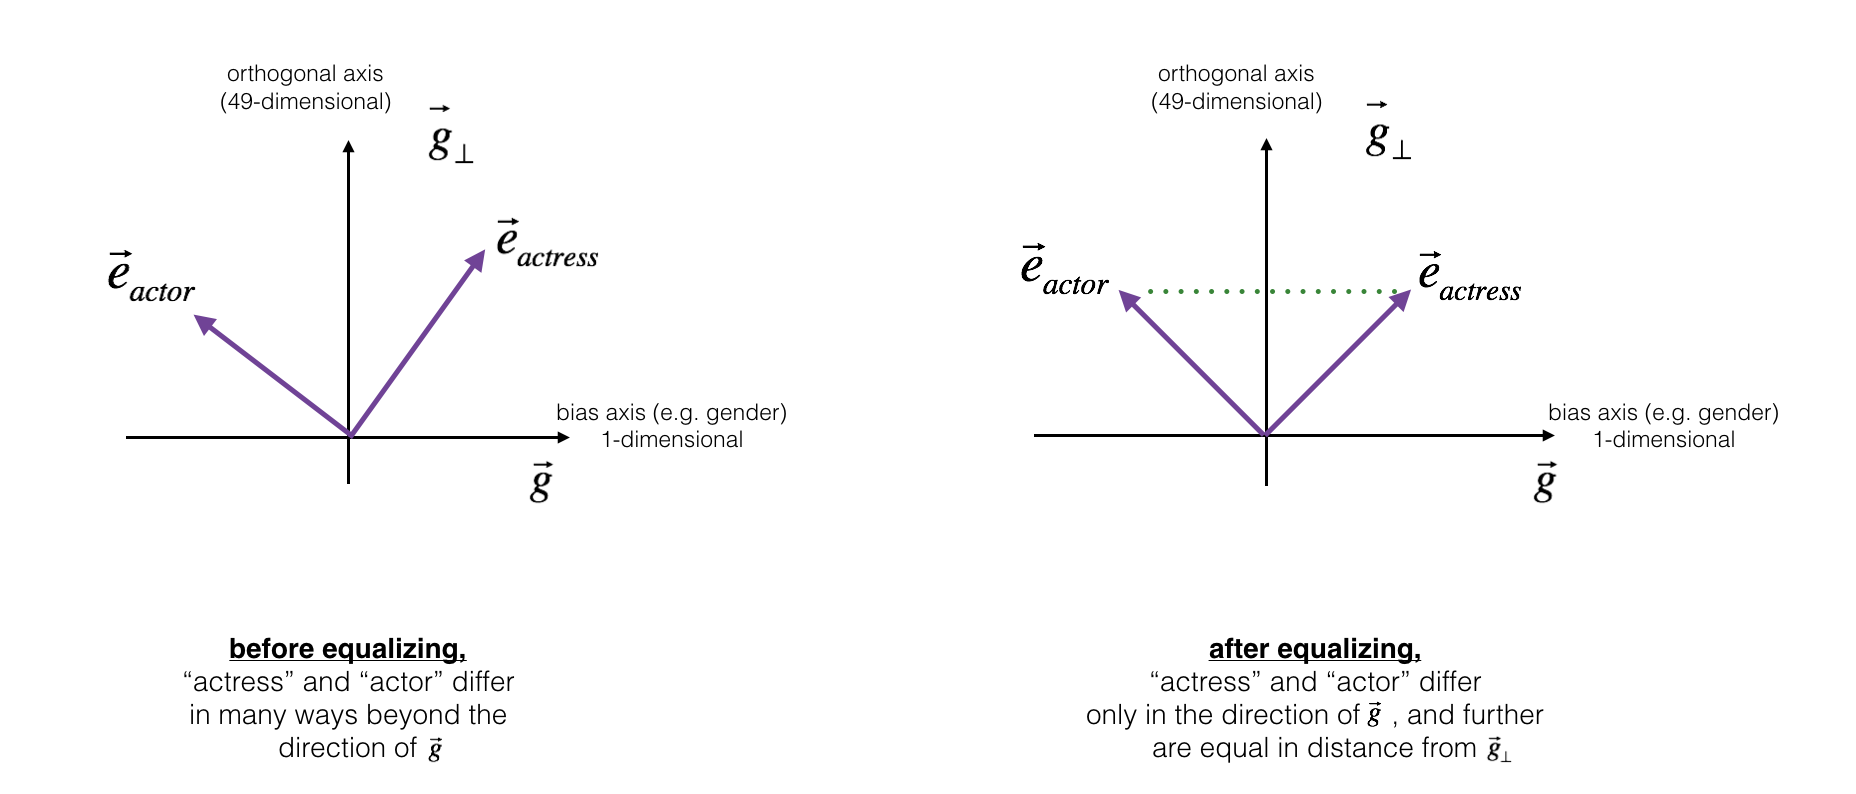

In [17]:
# Ejercicio 5. (a)
# definimos la funcion "closest_word"

# repetimos esto para recordarlo
Ushape = U.shape  #  = (10000, 100)
U2 = U**2
Un = np.sqrt(np.sum(U2,axis = 1)).reshape(Ushape[0],1)
U_rawnorm = U/Un # las filas de U_rawnorm estan normalizadas a 1
# y U_rawnorm[i,:] es la "mejor" proyeccion 100D de la palabra i

def closest_word(w):   # w debe ser una "word"
    w_index = words.index(w)
    v_w = U_rawnorm[w_index,:].reshape(Ushape[1],1) # proyeccion 100D de w
    
    U_exceptw = np.copy(U_rawnorm) # muy ineficiente uso de memoria...
    U_exceptw[w_index,:] = 0  # reemplazamos de U_rawnorm la fila correspondiente a w por ceros
    # esto es ineficiente en cuanto a memoria, hay mejores soluciones, pero tiene la virtud de
    # no cambiar los indices de las palabras, como hubiese pasado si, por ejemplo, hubiesemos
    # usado np.delete
    
    cos_allexcept_w = np.dot(U_exceptw, v_w) # como las filas de U_exceptw estan normalizadas
    # a 1, cos_sim_all es un vector con componentes iguales al cos del angulo entre las
    # proyecciones 100D de todas las palabras y la de la palabra w.
    
    index_closest = np.argmax(cos_allexcept_w)  # si a U_rawnorm no le hubiesemos reemplazado a v_w
                                                # por ceros, la mas cercana hubiese sido v_w. 
    return words[index_closest] # retorna la palabra cuya proyeccion 100D tiene el cos
                                # del angulo con la proyyeccion de w mas cercano a 1.

In [71]:
# Juegue con distintas palabras
print("Palabra mas cercana a 'man' = ", closest_word("man"))
print("Palabra mas cercana a 'woman' = ", closest_word("woman"),'\n')
print("Más palabras cercanas: \nPrestar atención a ver si detectamos algun tipo de sesgo. \n")
print("Palabra mas cercana a 'german' = ", closest_word("german"))
print("Palabra mas cercana a 'russian' = ", closest_word("russian"))
print("Palabra mas cercana a 'hungarian' = ", closest_word("hungarian"))
print("Palabra mas cercana a 'american' = ", closest_word("american"))
print("Palabra mas cercana a 'warrior' = ", closest_word("warrior"))
print("Palabra mas cercana a 'lover' = ", closest_word("lover"))
print("palabra mas cercana a 'school' = ", closest_word("school"))
print("palabra mas cercana a 'baby' = ", closest_word("baby"))
print("palabra mas cercana a 'credit' = ", closest_word("credit"))

Palabra mas cercana a 'man' =  woman
Palabra mas cercana a 'woman' =  girl 

Más palabras cercanas: 
Prestar atención a ver si detectamos algun tipo de sesgo. 

Palabra mas cercana a 'german' =  russian
Palabra mas cercana a 'russian' =  hungarian
Palabra mas cercana a 'hungarian' =  polish
Palabra mas cercana a 'american' =  african
Palabra mas cercana a 'warrior' =  dragon
Palabra mas cercana a 'lover' =  mistress
palabra mas cercana a 'school' =  college
palabra mas cercana a 'baby' =  girl
palabra mas cercana a 'credit' =  insurance


In [68]:
# Ejercicio 5. (b)

analogies = []  # vamos a transformar el archivo .txt en un np.array
with open("10 - analogy_task.txt", "r") as f:
    for line in f:     # Phyton entiende que line es una fila
        currow = line.replace("\n","").split(" ") # la operacion "split" toma una string y devuelve una list
        analogies.append(currow)
analogies[:10]  # analogies es una list de python, no un numpy array. list es mas flexible que np.array, por ejemplo no
                # todas las filas de una lista tiene que tener el mismo numero de elementos

[['athens', 'greece', 'bangkok', 'thailand'],
 ['athens', 'greece', 'beijing', 'china'],
 ['athens', 'greece', 'berlin', 'germany'],
 ['athens', 'greece', 'cairo', 'egypt'],
 ['athens', 'greece', 'canberra', 'australia'],
 ['athens', 'greece', 'helsinki', 'finland'],
 ['athens', 'greece', 'london', 'england'],
 ['athens', 'greece', 'madrid', 'spain'],
 ['athens', 'greece', 'moscow', 'russia'],
 ['athens', 'greece', 'oslo', 'norway']]

In [72]:
# funcion que automatiza la respuesta a analogias
# el input tiene que ser la lista de las primeras 3
# palabras de la analogia, aunque si contiene
# las 4 palabras funciona igual, y no lee la cuarta

def analogia(w):
    w1_index = words.index(w[0])
    w2_index = words.index(w[1])
    w3_index = words.index(w[2])
    
    v1 = U_rawnorm[w1_index,:].reshape(Ushape[1],1)
    v2 = U_rawnorm[w2_index,:].reshape(Ushape[1],1)
    v3 = U_rawnorm[w3_index,:].reshape(Ushape[1],1)
    
    v = v2 - v1 + v3
    
    U_except = np.copy(U_rawnorm) 
    U_except[w1_index,:] = 0
    U_except[w2_index,:] = 0
    U_except[w3_index,:] = 0
    
    
    cos_allexcept = np.dot(U_except, v)
    index_closest = np.argmax(cos_allexcept)
    
    return words[index_closest]

In [73]:
# Juegue con analogias
w = ["man", "woman", "king"]
print(w[0], " es a ", w[1], " como ", w[2], " es a?")
print(analogia(w))

man  es a  woman  como  king  es a?
queen


In [88]:
print("Más analogías: \nVerificar si hay algun tipo de sesgo.\n")

w = ["man", "woman", "engineer"]
print(w[0], " es a ", w[1], ", como ", w[2], " es a:    ", analogia(w))
w = ["man", "woman", "friend"]
print(w[0], " es a ", w[1], ", como ", w[2], " es a:    ", analogia(w))
w = ["man", "woman", "husband"]
print(w[0], " es a ", w[1], ", como ", w[2], " es a:    ", analogia(w))
w = ["man", "woman", "wife"]
print(w[0], " es a ", w[1], ", como ", w[2], " es a:    ", analogia(w))
w = ["he", "she", "matrix"]
print(w[0], " es a ", w[1], ", como ", w[2], " es a:    ", analogia(w))
w = ["he", "she", "economist"]
print(w[0], " es a ", w[1], ", como ", w[2], " es a:    ", analogia(w))

Más analogías: 
Verificar si hay algun tipo de sesgo.

man  es a  woman , como  engineer  es a:     photographer
man  es a  woman , como  friend  es a:     wife
man  es a  woman , como  husband  es a:     wife
man  es a  woman , como  wife  es a:     daughter
he  es a  she , como  matrix  es a:     vector
he  es a  she , como  economist  es a:     psychologist


In [123]:
# analogias del archivo "analogy_task.txt"
# i de 0 a 5584

i = 5584
print("ANALOGIA: ", analogies[i][0], " es a ", analogies[i][1], " como ", analogies[i][2], " es a?")
print("respuesta humana = ", analogies[i][3])
print("respuesta maquina = ", analogia(analogies[i]))

ANALOGIA:  write  es a  writes  como  work  es a?
respuesta humana =  works
respuesta maquina =  works


Resultados obtenidos del algoritmo de analogías:

- Hay dificultad en la predicción de capitales-países (Respuestas incorrectas: _Beijing-Korea ; Cairo-Morocco ; Canberra-Tanzania ; London-Britain ; Madrid-Argentina ; Moscow-Romania_ ; entre muchas otras)

- Tiene buen grado de predicción en adjetivos o sustantivos y sus formas comparativas (Respuestas correctas: _easy-easier ; good-better ; deep-deeper_ ; entre muchas otras)

Analicemos su grado de precisión a continuación:

In [130]:
# Calcular la precisión del Algoritmo

def Precision(array):
    rpositivo = 0
    rnegativo = 0
    
    for word in range(len(array)):
        if(analogies[word][3] == analogia(analogies[word])):
            rpositivo += 1
        else:
            rnegativo += 1
        word += 1
    
    accuracy = rpositivo / len(array)
    
    return accuracy

In [135]:
precision = Precision(analogies)

print("La precisión del algoritmo es: ", np.round(precision*100, 3), "%")

La precisión del algoritmo es:  55.094 %


Aunque de una forma no muy eficiente, ya que el cálculo tiene un costo de procesamiento elevado por emplear un for-loop y un condicional, podemos igual obtener la precisión del algoritmo (función) de analogías que se construyó anteriormente.

Como métrica de precisión se consideró tomar simplemente la proporción de respuestas correctas sobre el total de respuestas posibles (que es el largo del array pasado como parámetro). Como podemos ver en el resultado, la proporción de respuestas correctas es de 55%. En otras palabras, 1 de cada 2 analogías aproximadamente las computa bien.



### Ejercicio 5.c

Con el objetivo de poder mejorar la precisión de nuestra función de "_analogies reasoning_" como se denomina en la jerga de NLP, podemos proponer ciertos enfoques distintos, aunque por simplicidad del ejercicio y la capacidad de abordar semejante respuesta, nos limitaremos a la discusión conceptual y no una implementación en Python.

Así como aprendimos a vectorizar los conjuntos de palabras por medio de Singular Value Decomposition (a partir de la matriz de co-ocurrencia) y luego por medio de una función que analiza la distancia de similitud de coseno obtenemos los sinónimos de ciertas palabras, también hay otras formas de abordar y trabajar con word embeddings para predecir analogías en el área de Natural Language Processing. 

Por un lado, como propuesta de un modelo similar al nuestro, que aún usa la matriz de co-ocurrencia, es "**GloVe**" (Global Vectors for Word Representation, ver https://nlp.stanford.edu/projects/glove/). De igual manera este algoritmo de aprendizaje no supervisado reduce la dimensionalidad del logaritmo de la matriz de co-ocurrencia al descomponerla. ¿En qué manera podría mejorar nuestra precisión? En que podemos importar el modelo con un pre-entrenamiento de word-embeddings muchos más grandes (de hasta billones de palabras) y luego emplearlo con nuestro texto más pequeño. El resultado debería ser significativamente mejor. Hay implementaciones hechas con frameworks de ML para Python como TensorFlow o Keras.


Por otro lado, como propuesta de un modelo predictivo, existe un algoritmo basado en aprendizaje automático denominado "**Word2Vec**" (ver https://code.google.com/archive/p/word2vec/) que consta de crear un problema de aprendizaje supervisado vía context-target words, es decir, tener una "palabra contexto" y buscar "palabras objetivos" para ver si clasifican o no para dicho contexto. La palabra objetivo puede ser un sinónimo o una continuación en la oración. Por ejemplo, si pasamos la palabra "orange" como contexto, nuestro objetivo puede ser predecir si le sigue la palabra "juice" o "glass", o bien si un sinónimo correcto es "fruta" o "color". 
Por como el nombre lo indica, las palabras son vectorizadas al igual que en nuestra metodología, sin embargo como principal diferencia, Word2Vec usa un modelo de **Recurrent Neural Networks** con método de clasificación Softmax  por lo general (como referencia ver también Mikolov et. al., 2013. _Efficient estimation of word representations in vector space_). El modelo aprende los vectores input para mejorar su capacidad de predicción/clasificación.

Como se indicó brevemente antes, ¿qué ventajas tienen estos algoritmos? 
Existe una buena práctica en Machine Learning que se llama "**_Transfer Learning_**", que significa que uno puede transferir el conocimiento de un modelo a otro. En ese sentido, nosotros podríamos armar un modelo GloVe, pero que haya aprendido Word Embeddings de otros textos más grandes (un corpus de 100 billones de palabras, por ejemplo). De esa manera, después se emplea el algoritmo para un nueva tarea con nuestro corpus más pequeño y su capacidad de predicción va a ser mucho más alta.


